In [8]:
#Lets see how to predict stock price using ML techniques
# import necessary libraries
import numpy as np 
import pandas as pd  
import pandas.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# import the data using pandas 
df = pd.read_csv('../Data/dataset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-02-14,392.932007,407.230011,392.932007,407.230011,407.230011,74469800.0
1,2016-02-15,407.567993,410.381012,397.748993,400.184998,400.184998,74070496.0
2,2016-02-16,401.432007,408.945007,401.432007,407.488007,407.488007,73093104.0
3,2016-02-17,407.656006,421.166992,406.783997,416.321991,416.321991,83193600.0
4,2016-02-18,416.571991,425.996002,415.638000,422.372986,422.372986,76752600.0


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 7 columns):
Date         1828 non-null datetime64[ns]
Open         1824 non-null float64
High         1824 non-null float64
Low          1824 non-null float64
Close        1824 non-null float64
Adj Close    1824 non-null float64
Volume       1824 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 100.0 KB


In [11]:
df1 = df.reset_index()['Close'] #stock prediction for close column, all close values in df1

In [12]:
df1

0         407.230011
1         400.184998
2         407.488007
3         416.321991
4         422.372986
5         420.785004
6         437.164001
7         438.798004
8         437.747986
9         420.735992
10        424.954987
11        424.544006
12        432.152008
13        432.519012
14        433.503998
15        437.696991
16        435.122986
17        423.989014
18        421.651001
19        410.938995
20        400.570007
21        407.707001
22        414.321014
23        413.971985
24        414.859985
25        417.131012
26        421.690002
27        411.623993
28        414.065002
29        416.437988
            ...     
1798    36178.140625
1799    35791.277344
1800    36630.074219
1801    36069.804688
1802    35547.750000
1803    30825.699219
1804    33005.761719
1805    32067.642578
1806    32289.378906
1807    32366.392578
1808    32569.849609
1809    30432.546875
1810    31649.605469
1811    34316.386719
1812    34269.523438
1813    33114.359375
1814    33537

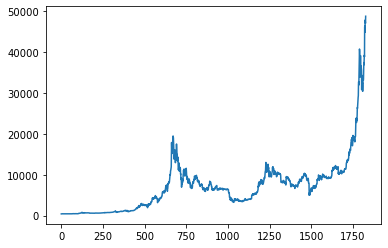

In [13]:
plt.plot(df1)

In [14]:
#LSTM as very sensitive for scale data

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1

array([[1.45460344e-04],
       [0.00000000e+00],
       [1.50787259e-04],
       ...,
       [9.72583157e-01],
       [9.64337957e-01],
       [1.00000000e+00]])

In [17]:
# Time series data we should split the data with respect to date because it will depend on previous data, so we should split this data based up on date.

In [18]:
#splitting dataset, train and test
training_size = int(len(df1)*0.75)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [19]:
training_size, test_size

(1371, 457)

In [20]:
# convert an array of values into a dataset matrix
# Reshape into X=t, t+1, t+2....t+n and Y=t+n+1
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [22]:
print(x_train.shape), print(y_train.shape)

(1270, 100)
(1270,)


(None, None)

In [23]:
print(x_test.shape), print(y_test.shape)

(356, 100)
(356,)


(None, None)

In [24]:
# Reshape input to be [sample, time steps, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [25]:
# Create the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [26]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=1)

Train on 1270 samples, validate on 356 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1270/1270 [==============================] - 19s 15ms/sample - loss: 0.0040 - val_loss: nan
Epoch 2/100
1270/1270 [==============================] - 15s 12ms/sample - loss: 5.5815e-04 - val_loss: nan
Epoch 3/100
1270/1270 [==============================] - 16s 13ms/sample - loss: 4.1411e-04 - val_loss: nan
Epoch 4/100
1270/1270 [==============================] - 15s 12ms/sample - loss: 3.7086e-04 - val_loss: nan
Epoch 5/100
1270/1270 [==============================] - 13s 11ms/sample - loss: 3.2823e-04 - val_loss: nan
Epoch 6/100
1270/1270 [==============================] - 11s 9ms/sample - loss: 3.0924e-04 - val_loss: nan
Epoch 7/100
1270/1270 [==============================] - 11s 9ms/sample - loss: 2.8663e-04 - val_loss: nan
Epoch 8/100
1270/1270 [==============================] - 11s 8ms/sample - loss: 2.6581e-04 - val_loss: nan
Epoch 9/100
1270/1270 [=========================

KeyboardInterrupt: 

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df = df.dropna(how='any',axis=0)

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
plt.figure(0, figsize=(12, 8))
plt.title('Close Price History', fontsize=14)
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD($)', fontsize=14)
plt.show()

In [ ]:
X, Y = df.drop(columns=['Date', 'Close'], axis=1), df['Close']

In [ ]:
X = np.asarray(X)
Y = np.asarray(Y)
X, Y

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state=42)

In [ ]:
linear = LinearRegression()
linear.fit(x_train, y_train)

In [ ]:
print('Training: {:6.2f}%'.format(100*linear.score(x_train, y_train)))
print('Validation: {:6.2f}%'.format(100*linear.score(x_test, y_test)))

In [ ]:
y_pred = linear.predict(y_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))